<a href="https://colab.research.google.com/github/wayaadhyasta/GoldPricePrediction_MachineLearning/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [73]:
dt = pd.read_csv('/content/drive/MyDrive/Gold Futures Historical Data.csv')
dt

,Date,Price,Open,High,Low,Vol.,Change %
0,03/01/2025,"2,935.59","2,867.85","2,939.70","2,867.40",267.24K,2.56%
1,02/01/2025,"2,862.20","2,846.50","2,974.00","2,802.20",3.12M,0.96%
2,01/01/2025,"2,835.00","2,652.00","2,862.90","2,638.90",386.65K,6.85%
3,12/01/2024,"2,653.30","2,673.80","2,761.30","2,596.70",2.92M,-1.03%
4,11/01/2024,"2,681.00","2,766.90","2,782.80","2,560.80",360.31K,-2.92%
5,10/01/2024,"2,761.60","2,656.10","2,813.10","2,618.80",3.63M,4.29%
6,09/01/2024,"2,647.90","2,509.00","2,684.00","2,479.80",166.00K,5.24%
7,08/01/2024,"2,516.00","2,469.60","2,546.80","2,382.80",186.00K,2.72%
8,07/01/2024,"2,449.30","2,355.20","2,500.50","2,344.40",46.24K,4.19%
9,06/01/2024,"2,350.90","2,348.00","2,406.70","2,304.20",3.06M,0.73%


In [74]:
dt.columns = ["Date", "Price", "Open", "High", "Low", "Vol.","Change %"]
dt["Date"] = pd.to_datetime(dt["Date"])
dt.sort_values("Date", ascending=True, inplace=True)
dt["Price"] = dt["Price"].str.replace(',', '').astype(float)
dt["Target"] = dt["Price"].shift(-1) > dt["Price"]
dt.dropna(inplace=True)

In [75]:
dt

,Date,Price,Open,High,Low,Vol.,Change %,Target
23,2023-04-01,2018.30,"2,007.50","2,080.80","1,984.50",117.36K,0.71%,False
22,2023-05-01,1982.10,"2,019.10","2,102.20","1,949.60",1.45M,-1.79%,False
21,2023-06-01,1929.40,"1,981.30","2,000.70","1,900.60",3.65M,-2.66%,True
20,2023-07-01,2009.20,"1,945.40","2,010.90","1,927.60",246.57K,4.14%,False
19,2023-08-01,1965.90,"2,004.20","2,004.40","1,913.60",3.17M,-2.16%,False
18,2023-09-01,1885.40,"1,966.40","1,980.20","1,881.50",3.09M,-4.09%,True
17,2023-10-01,1994.30,"1,864.40","2,019.70","1,823.50",4.66M,5.78%,True
16,2023-11-01,2038.10,"1,993.30","2,052.10","1,935.60",3.67M,2.20%,True
15,2023-12-01,2071.80,"2,049.00","2,140.70","1,979.00",251.34K,1.65%,False
14,2024-01-01,2057.40,"2,072.70","2,088.10","2,004.00",3.84M,-0.70%,False


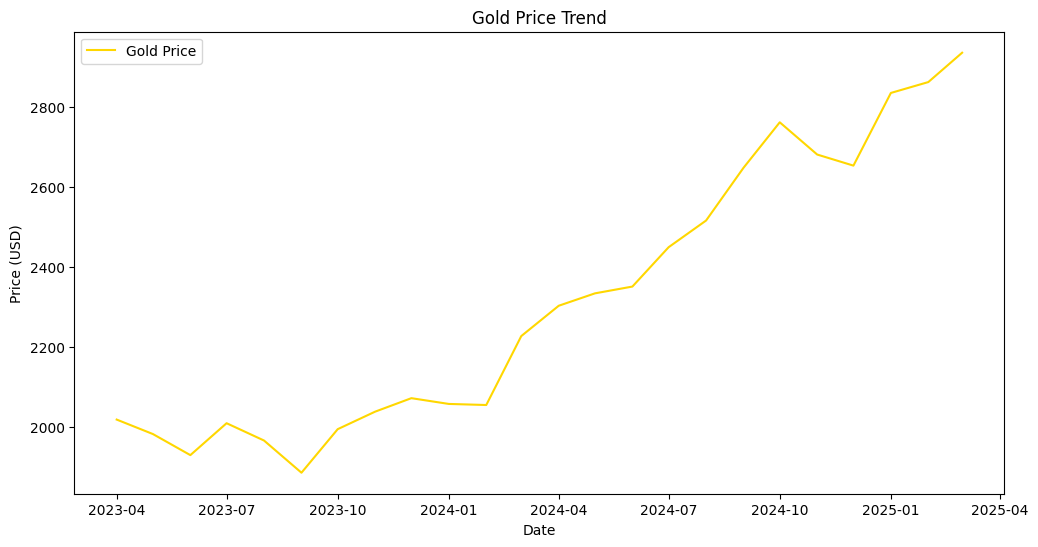

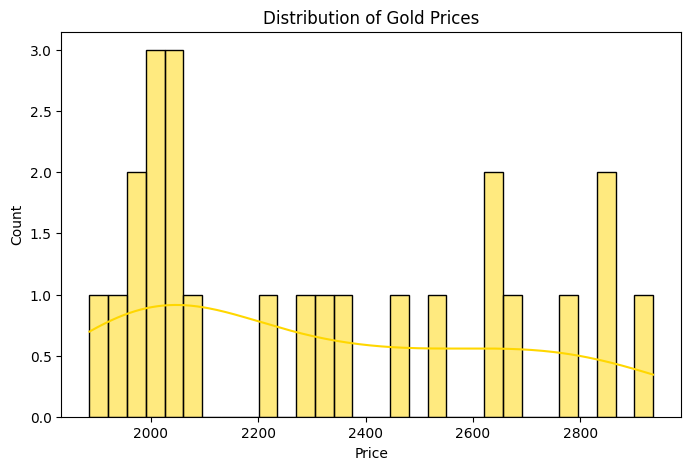

<ipython-input-76-0c4e784c0547>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dt["Target"].astype(int), palette="viridis")


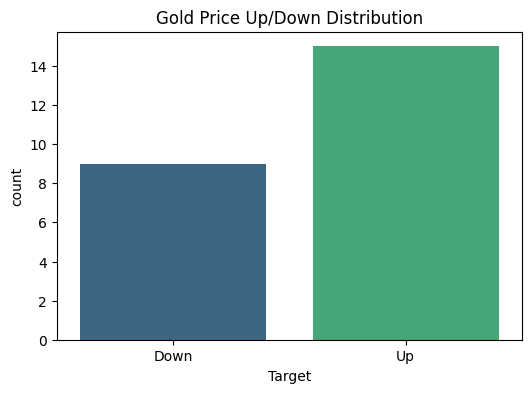

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(dt["Date"], dt["Price"], label="Gold Price", color='gold')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Gold Price Trend")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(dt["Price"], bins=30, kde=True, color='gold')
plt.title("Distribution of Gold Prices")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=dt["Target"].astype(int), palette="viridis")
plt.xticks([0, 1], ['Down', 'Up'])
plt.title("Gold Price Up/Down Distribution")
plt.show()

In [86]:
dt_up = dt[dt["Target"] == True]
print("Data dengan harga naik:")
print(dt_up.head())

Data dengan harga naik:
         Date   Price    Open    High     Low     Vol. Change %  Target
21 2023-06-01  1929.4  1981.3  2000.7  1900.6    3.65M   -2.66%    True
18 2023-09-01  1885.4  1966.4  1980.2  1881.5    3.09M   -4.09%    True
17 2023-10-01  1994.3  1864.4  2019.7  1823.5    4.66M    5.78%    True
16 2023-11-01  2038.1  1993.3  2052.1  1935.6    3.67M    2.20%    True
13 2024-02-01  2054.7  2047.7  2072.9  1987.2  384.71K   -0.13%    True


In [87]:
dt_down = dt[dt["Target"] == False]
print("Data dengan harga turun:")
print(dt_down.head())

Data dengan harga turun:
         Date   Price    Open    High     Low     Vol. Change %  Target
23 2023-04-01  2018.3  2007.5  2080.8  1984.5  117.36K    0.71%   False
22 2023-05-01  1982.1  2019.1  2102.2  1949.6    1.45M   -1.79%   False
20 2023-07-01  2009.2  1945.4  2010.9  1927.6  246.57K    4.14%   False
19 2023-08-01  1965.9  2004.2  2004.4  1913.6    3.17M   -2.16%   False
15 2023-12-01  2071.8  2049.0  2140.7  1979.0  251.34K    1.65%   False


In [77]:
features = ["Open", "High", "Low"]
X = dt[features]
y = dt["Target"].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
dt

,Date,Price,Open,High,Low,Vol.,Change %,Target
23,2023-04-01,2018.30,"2,007.50","2,080.80","1,984.50",117.36K,0.71%,False
22,2023-05-01,1982.10,"2,019.10","2,102.20","1,949.60",1.45M,-1.79%,False
21,2023-06-01,1929.40,"1,981.30","2,000.70","1,900.60",3.65M,-2.66%,True
20,2023-07-01,2009.20,"1,945.40","2,010.90","1,927.60",246.57K,4.14%,False
19,2023-08-01,1965.90,"2,004.20","2,004.40","1,913.60",3.17M,-2.16%,False
18,2023-09-01,1885.40,"1,966.40","1,980.20","1,881.50",3.09M,-4.09%,True
17,2023-10-01,1994.30,"1,864.40","2,019.70","1,823.50",4.66M,5.78%,True
16,2023-11-01,2038.10,"1,993.30","2,052.10","1,935.60",3.67M,2.20%,True
15,2023-12-01,2071.80,"2,049.00","2,140.70","1,979.00",251.34K,1.65%,False
14,2024-01-01,2057.40,"2,072.70","2,088.10","2,004.00",3.84M,-0.70%,False


In [79]:
dt = pd.read_csv('/content/drive/MyDrive/Gold Futures Historical Data.csv')
dt.columns = ["Date", "Price", "Open", "High", "Low", "Vol.","Change %"]
dt["Date"] = pd.to_datetime(dt["Date"])
dt.sort_values("Date", ascending=True, inplace=True)

# Convert 'Price', 'Open', 'High', 'Low' columns to float
for col in ["Price", "Open", "High", "Low"]:
    dt[col] = dt[col].str.replace(',', '').astype(float)

dt["Target"] = dt["Price"].shift(-1) > dt["Price"]
dt.dropna(inplace=True)

In [80]:
dt

,Date,Price,Open,High,Low,Vol.,Change %,Target
23,2023-04-01,2018.30,2007.50,2080.8,1984.5,117.36K,0.71%,False
22,2023-05-01,1982.10,2019.10,2102.2,1949.6,1.45M,-1.79%,False
21,2023-06-01,1929.40,1981.30,2000.7,1900.6,3.65M,-2.66%,True
20,2023-07-01,2009.20,1945.40,2010.9,1927.6,246.57K,4.14%,False
19,2023-08-01,1965.90,2004.20,2004.4,1913.6,3.17M,-2.16%,False
18,2023-09-01,1885.40,1966.40,1980.2,1881.5,3.09M,-4.09%,True
17,2023-10-01,1994.30,1864.40,2019.7,1823.5,4.66M,5.78%,True
16,2023-11-01,2038.10,1993.30,2052.1,1935.6,3.67M,2.20%,True
15,2023-12-01,2071.80,2049.00,2140.7,1979.0,251.34K,1.65%,False
14,2024-01-01,2057.40,2072.70,2088.1,2004.0,3.84M,-0.70%,False


In [81]:
# Convert 'Open', 'High', 'Low' columns to numeric in X_train and X_test
for col in ["Open", "High", "Low"]:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')  # errors='coerce' handles non-numeric values by setting them to NaN
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Now, try fitting the XGBoost model again
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.4


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:28:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [82]:
dt

,Date,Price,Open,High,Low,Vol.,Change %,Target
23,2023-04-01,2018.30,2007.50,2080.8,1984.5,117.36K,0.71%,False
22,2023-05-01,1982.10,2019.10,2102.2,1949.6,1.45M,-1.79%,False
21,2023-06-01,1929.40,1981.30,2000.7,1900.6,3.65M,-2.66%,True
20,2023-07-01,2009.20,1945.40,2010.9,1927.6,246.57K,4.14%,False
19,2023-08-01,1965.90,2004.20,2004.4,1913.6,3.17M,-2.16%,False
18,2023-09-01,1885.40,1966.40,1980.2,1881.5,3.09M,-4.09%,True
17,2023-10-01,1994.30,1864.40,2019.7,1823.5,4.66M,5.78%,True
16,2023-11-01,2038.10,1993.30,2052.1,1935.6,3.67M,2.20%,True
15,2023-12-01,2071.80,2049.00,2140.7,1979.0,251.34K,1.65%,False
14,2024-01-01,2057.40,2072.70,2088.1,2004.0,3.84M,-0.70%,False


In [83]:
# 6. LSTM (Deep Learning)
# Convert features to numeric before expanding dimensions
# Ensure all columns are of numeric type
for col in X.columns:
    X[col] = X[col].str.replace(',', '', regex=True).astype(float)  # Remove commas and convert to float

X_lstm = np.expand_dims(X, axis=2)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

# ... (rest of the code remains the same)

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=16, validation_data=(X_test_lstm, y_test_lstm))

Epoch 1/10


<ipython-input-83-28c4d3714a56>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].str.replace(',', '', regex=True).astype(float)  # Remove commas and convert to float
<ipython-input-83-28c4d3714a56>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].str.replace(',', '', regex=True).astype(float)  # Remove commas and convert to float
<ipython-input-83-28c4d3714a56>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 543ms/step - accuracy: 0.3147 - loss: 0.7642 - val_accuracy: 0.6000 - val_loss: 0.6804
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.3147 - loss: 0.7078 - val_accuracy: 0.6000 - val_loss: 0.6909
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7061 - loss: 0.6763 - val_accuracy: 0.4000 - val_loss: 0.7040
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5735 - loss: 0.6784 - val_accuracy: 0.4000 - val_loss: 0.7198
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6645 - loss: 0.6609 - val_accuracy: 0.4000 - val_loss: 0.7385
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6853 - loss: 0.6418 - val_accuracy: 0.4000 - val_loss: 0.7595
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7061 - loss: 0.6305 - val_accuracy: 0.4000 - val_loss: 0.7788
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6645 - loss: 0.6388 - val_accuracy: 0.4000 - val_loss: 0.7959
Epoch 9/10

In [84]:
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype(int)
print("LSTM Accuracy:", accuracy_score(y_test_lstm, y_pred_lstm))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
LSTM Accuracy: 0.4
